# Stock Market Analysis

##### The stock market refers to a marketplace where buyers and sellers trade shares of publicly listed companies. It is a centralized platform where investors can buy or sell stocks, which represent partial ownership in a company. The stock market provides a means for companies to raise capital by issuing shares to the public and allows investors to participate in the company's growth and profitability. The stock market operates through exchanges, such as the New York Stock Exchange (NYSE) or the Nasdaq, where stocks are bought and sold. These exchanges serve as intermediaries, facilitating the trading of stocks between buyers and sellers. Investors can place orders to buy or sell stocks through brokerage firms that are members of these exchanges. Stock prices in the market are determined by supply and demand dynamics. When there is high demand for a particular stock, its price tends to rise, and when there is low demand or increased selling pressure, the price tends to fall. Various factors such as company performance, economic conditions, industry trends, and investor sentiment influence the demand and supply of stocks. Investors can make money in the stock market through capital appreciation and dividends. Capital appreciation refers to the increase in the stock's price over time, allowing investors to sell their shares at a higher price than what they initially paid. 

# Stock Market Analysis through Machine Learning Models

##### Machine learning models play a significant role in stock market analysis. They have the potential to analyze vast amounts of data, identify patterns, and generate insights that can aid investors and traders in making more informed decisions. 
##### Through Pattern recognition, Machine learning models can be trained to recognize complex patterns and relationships in historical stock price data. By analyzing large datasets, these models can identify recurring patterns, correlations, and trends that may not be apparent to human analysts. This enables them to make predictions or generate trading signals based on historical patterns.
##### Similarly, machine learning models can be used to predict future stock prices or market movements. By analyzing various factors such as historical price data, company fundamentals, market news, and macroeconomic indicators, these models can generate forecasts or estimates of future stock prices. These predictions can be valuable for investors and traders looking to make informed investment decisions. Moreover, we can perform sentiment analysis, portfolio optimization and risk assessment through machine learning models within the Stock market for better decision making. It's important to note that while machine learning models can provide valuable insights, they are not infallible and should be used as tools in conjunction with other forms of analysis.  

#### In this notebook, our primary goal is to use three types of machine learning models including time forecasting model, ARIMA (Auto-regressive integrated moving average), LSTM (long short term memory) model and, in order to predict the future stock prices of the tech giant Apple Inc. 

# Price Prediction of the Apple Stock

##### According to Apple's latest financial reports and stock price the company's current number of shares outstanding is 15,787,154,000 (17.52 billion shares). The market capitalization of Apple as of now is over $2.76 trilliion dollars. We now use machine learning models to predict future stock prices of Apple and look over how Apple grew as a company since it went public back in 1980. 

## Importing relevant libraries

In [1]:
import pandas as pd
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sns
import numpy as np
import random
import re # importing regex to filter tweets
import nltk # improting natural language tool kit which contains the sentiment analyzer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
# analyzer in the pre-built vader model to detect text polarity
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
import plotly.express as px
import plotly.graph_objs as go
import collections
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.iolib.summary2 import summary_col
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
# way to include images of maps!
from IPython import display
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

## Exploratory Data Analysis

##### Reading the Apple stock market dataset that was retrieved on May 26th, 2023 from Yahoo Finance for each day since the beginning of the time when Apple went Public back in 1980

In [2]:
apple_data = pd.read_csv(r"../Stock Price Prediction Project\AAPL_daily.csv")

##### Changing the date time structure which Python understands

In [3]:
apple_data['Date'] = pd.to_datetime(apple_data['Date'])

##### Renaming columns of the data set for convenience in the future

In [4]:
apple_data = apple_data.rename(columns = {'Date' : 'date', 'High' : 'high', 'Low' : 'low', 'Open' : 'open', 'Close' : 'close', 'Volume' : 'volume', 'Adj Close' : 'adj close'})

##### Note that the total number of observations is 10,704 meaning that we have the data for 10,704 days from 1980 to 2022 but the duration between our data is 15,505 days which means that our data does not contain 4801 days. These may include weekend and public holidays in which the stock market is closed!

In [5]:
apple_data.count()

date         10704
open         10704
high         10704
low          10704
close        10704
adj close    10704
volume       10704
dtype: int64

In [6]:
print("Starting date: ",apple_data.iloc[0][0])
print("Ending date: ", apple_data.iloc[-1][0])
print("Duration: ", apple_data.iloc[-1][0]-apple_data.iloc[0][0])

Starting date:  1980-12-12 00:00:00
Ending date:  2023-05-26 00:00:00
Duration:  15505 days 00:00:00


In [7]:
apple_data[['open', 'high', 'low', 'close', 'adj close', 'volume']].describe()

,open,high,low,close,adj close,volume
count,10704.000000,10704.000000,10704.000000,10704.000000,10704.000000,1.070400e+04
mean,17.778419,17.980290,17.583084,17.790198,17.078371,3.251697e+08
std,37.470105,37.917944,37.049846,37.505563,37.125803,3.372295e+08
min,0.049665,0.049665,0.049107,0.049107,0.038102,0.000000e+00
25%,0.290090,0.297991,0.283482,0.290580,0.238947,1.191988e+08
50%,0.493304,0.500915,0.486607,0.494353,0.410250,2.123772e+08
75%,17.562054,17.752768,17.383303,17.539286,15.258768,4.047515e+08
max,182.630005,182.940002,179.119995,182.009995,180.434296,7.421641e+09


##### We look over different visualizations over how Apple stock prices changed over the years. For that, we divided the data set into groups in order to observe the stock price changes for every 10 years

In [8]:
year_wise = apple_data.groupby(apple_data['date'].dt.strftime('%Y'))[['high', 'low', 'open', 'close', 'volume', 'adj close']].mean()

In [9]:
year_wise = year_wise.reset_index()
year_wise = year_wise.sort_values('date')

##### Dividing the data set into decades to visualize the open and close values for each decade individually

In [10]:
apple_data_80s = year_wise.head(10)
apple_data_90s = year_wise.iloc[10:20]
apple_data_00s = year_wise.iloc[20:30]
apple_data_10s = year_wise.iloc[30:]

## What is a stock split and it's effect on the valuation of the company and share price

##### A stock split happens when a company increases the number of its shares to boost the stock's liquidity. Although the number of shares outstanding increases by a specific multiple, the total dollar value of all shares outstanding remains the same because a split does not fundamentally change the company's value. Although the number of shares outstanding increases, there is no change to the company's total market capitalization as the price of each share will split as well.The most common split ratios are 2-for-1 or 3-for-1, which means every single share before the split will turn into multiple shares after the split.
##### Apple's stock has been split five times since the company went public. The stock split on a 4-for-1 basis on August 28, 2020, a 7-for-1 basis on June 9, 2014, and split on a 2-for-1 basis on February 28, 2005, June 21, 2000, and June 16, 1987.

##### Barplots for the closing stock prices in the 1980's

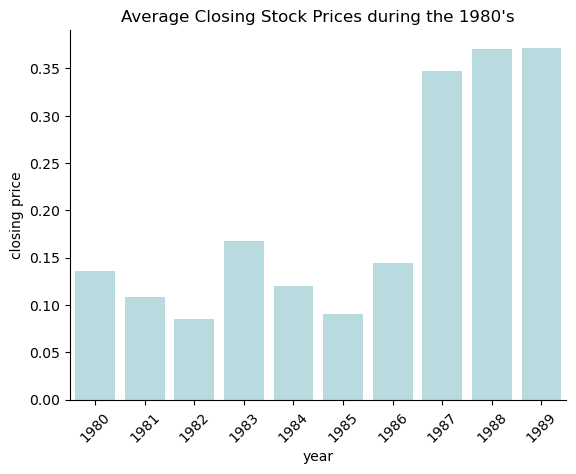

In [11]:
close_80s = sns.barplot(data = apple_data_80s, x = 'date', y = 'close', color = 'powderblue')
sns.despine()
plt.xticks(rotation=45)
close_80s.set(title = "Average Closing Stock Prices during the 1980's", ylabel = 'closing price', xlabel = 'year')
plt.show()

#### Barplots of the average closing stock prices in the 1990s

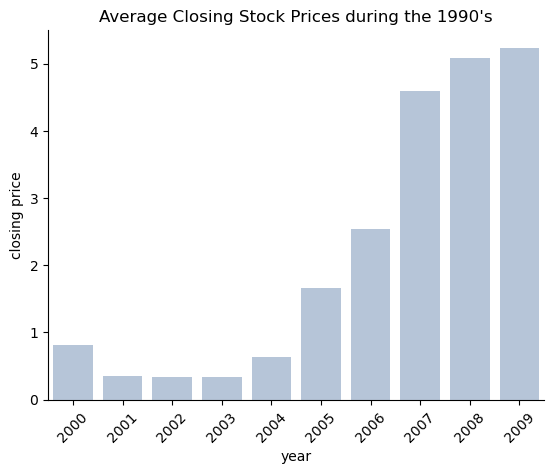

In [12]:
close_90s = sns.barplot(data = apple_data_00s, x = 'date', y = 'open', color = 'lightsteelblue')
sns.despine()
plt.xticks(rotation=45)
close_90s.set(title = "Average Closing Stock Prices during the 1990's", ylabel = 'closing price', xlabel = 'year')
plt.show()

#### Barplots of the average closing stock prices in the 2000s

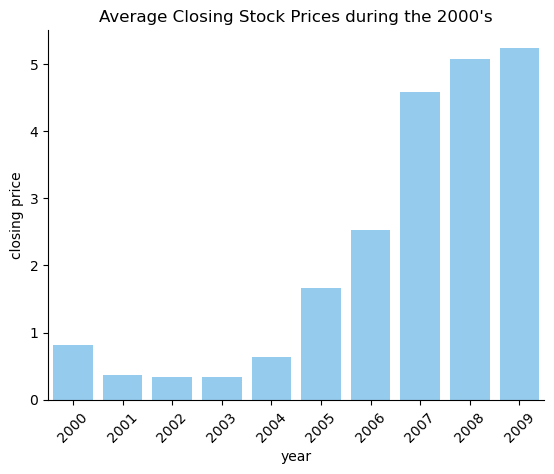

In [13]:
close_00s = sns.barplot(data = apple_data_00s, x = 'date', y = 'close', color = 'lightskyblue')
sns.despine()
plt.xticks(rotation=45)
close_00s.set(title = "Average Closing Stock Prices during the 2000's", ylabel = 'closing price', xlabel = 'year')
plt.show()

#### Barplots of the average closing stock prices in the 2010s

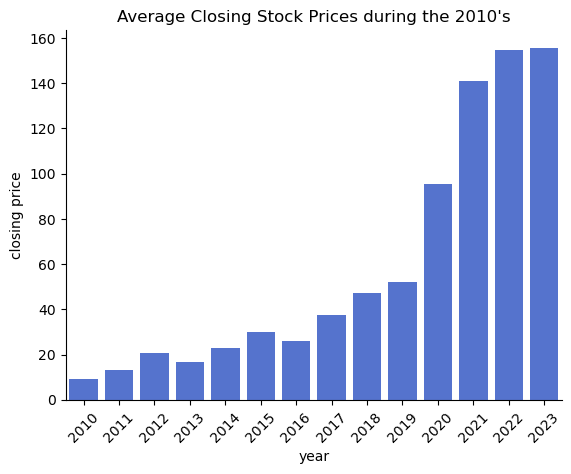

In [14]:
close_10s = sns.barplot(data = apple_data_10s, x = 'date', y = 'close', color = 'royalblue')
sns.despine()
plt.xticks(rotation=45)
close_10s.set(title = "Average Closing Stock Prices during the 2010's", ylabel = 'closing price', xlabel = 'year')
plt.show()


## Volatility Analysis
##### Volatility is the rate at which the price of a stock increases or decreases over a particular period. Volatility analysis in stock prices refers to the process of assessing and measuring the degree of price fluctuations or variability in the value of a stock over a certain period of time. Volatility is a key concept in finance and investing, as it helps investors and traders understand the potential risks and opportunities associated with a particular stock or market. Higher stock price volatility often means higher risk and helps an investor to estimate the fluctuations that may happen in the future.

##### There are two main types of volatility historical and implied. For our purpose we will be assessing historical volatility. Historical Volatility measures past price movements of a stock or market index over a specific period. It is typically calculated using statistical methods, such as calculating the standard deviation of price returns. Historical volatility provides an indication of how much a stock's price has deviated from its average price in the past.

##### Volatility Analysis is important for risk assessment, trading strategies, options trading and investment decisions. In summary, this is a crucial tool in assessing the risk and potential returns associated with investing in stocks and other financial instruments. It helps investors and traders make more informed decisions and manage their exposure to market fluctuations.


##### Below we see that there were a decent amount of big spikes in volatility in a few periods like in 2002, 2009 and in 2011. 

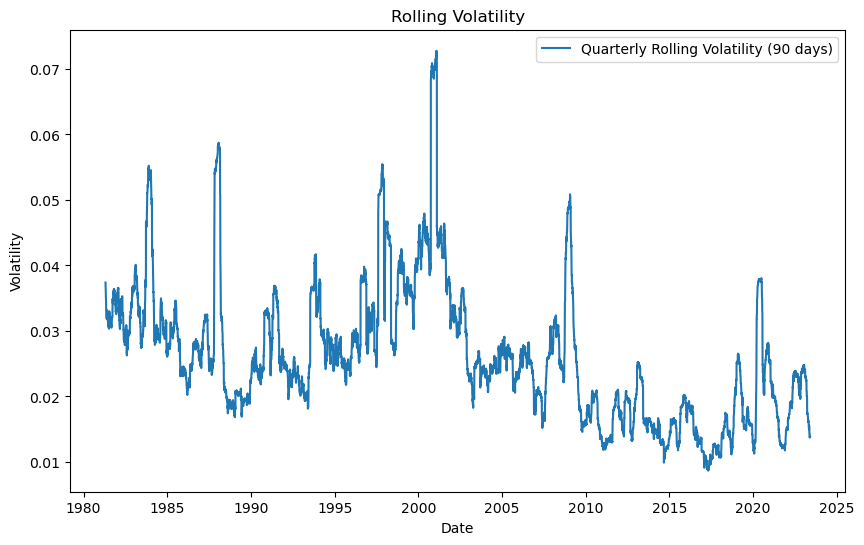

In [15]:
# Volatility Analysis
apple_data['daily_returns'] = apple_data['close'].pct_change()
rolling_volatility = apple_data['daily_returns'].rolling(window=90).std()
plt.figure(figsize=(10, 6))
plt.plot(apple_data['date'], rolling_volatility, label='Quarterly Rolling Volatility (90 days)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Rolling Volatility')
plt.legend()
plt.show()

### Correlation Matrix
##### In the context of a correlation matrix, a heatmap can help you understand the degree and direction of correlation between pairs of stocks. A heatmap is a graphical representation of data where individual values are represented as colors. Here we see the linear relatoinship between the variables in our stock data set.

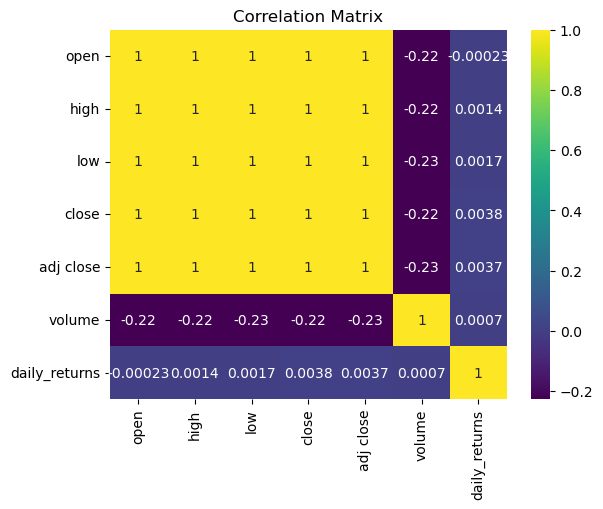

In [16]:
# Correlation and Cointegration
correlation_matrix = apple_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

## Time-Series Forecasting: Predicting Stock Prices Using ARIMA (AutoRegressive Integrated Moving Average) Model

##### Time-series forecasting models are the models that are capable to predict future values based on previously observed values. Time-series forecasting is widely used for non-stationary data. Non-stationary data are called the data whose statistical properties e.g. the mean and standard deviation are not constant over time but instead, these metrics vary over time. These non-stationary input data (used as input to these models) are usually called time-series. Some examples of time-series include the temperature values over time, stock price over time, price of a house over time etc. So, the input is a signal (time-series) that is defined by observations taken sequentially in time. Note that Time-series data is recorded on a discrete time scale.

##### The following code visualizes the overall time series representation of the stock opening prices since Apple went public

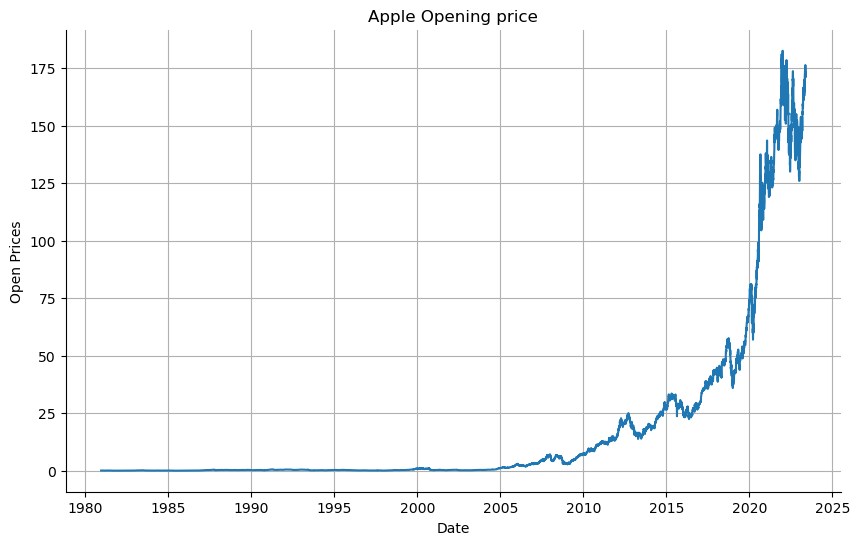

In [17]:
#plot open price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(apple_data['date'], apple_data['open'])
plt.title('Apple Opening price')
sns.despine()
plt.show()

##### The following code visualizes the overall time series representation of the stock closing prices since the beginning

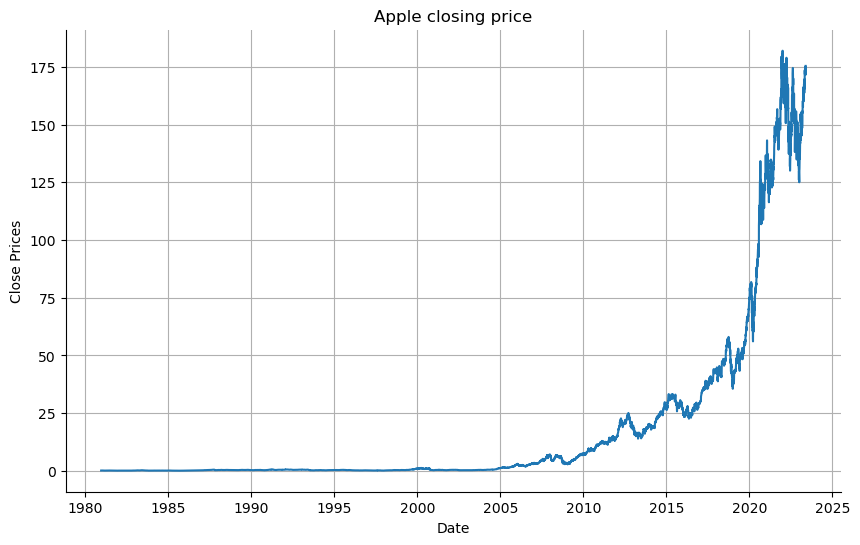

In [18]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(apple_data['date'], apple_data['close'])
plt.title('Apple closing price')
sns.despine()
plt.show()

##### From this point onwards, I have decided to to use the observation beginning from May 27th 2008 to May 26th 2023. There are two reasons to not take the data before that into consideration. Firstly, the computation power needed to run the ARIMA model for the data since the beginning takes long periods of time. Secondly, after observing the data, I observed that the  increase in the share price has begun since 2008. I took May 27th to make sure that I take the last 15 years of data to predict the future prices given our last observation is May 26th 2023!

In [20]:
apple_data_last_15yrs = apple_data[apple_data['date'] > '2008-05-26']
# filtered_df = df[df['date'] > '2008-05-26']

##### Visualizing last 15 years of closing stock prices of Apple

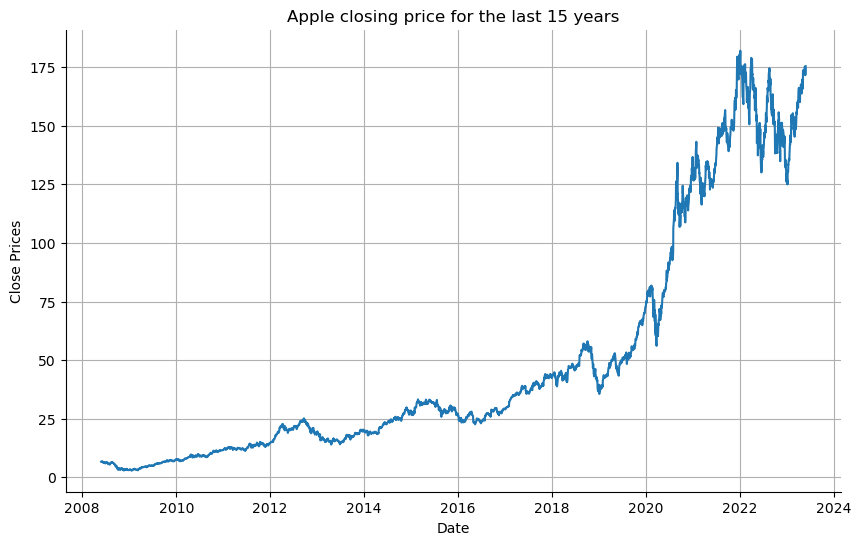

In [21]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(apple_data_last_15yrs['date'], apple_data_last_15yrs['close'])
plt.title('Apple closing price for the last 15 years')
sns.despine()
plt.show()

### ARIMA Definitions and Methodology

##### ARIMA models are a fusion of two models and one methodology. The two models incorporated are Auto Regression (AR) and Moving Average (MA), while the methodology employed is integration by differencing (I). When dealing with non-stationary time series, these three components collaborate. To put it simply, an ARIMA model can be defined as a model that utilizes differencing (I) at least once to render the data stationary, and combines autoregressive and moving average elements to generate forecasts based on historical time-series data.

##### To make a better explanation of ARIMA we can also write it as (AR, I, MA) and by this, we can assume that in the ARIMA, $p$ is AR, $d$ is I, and $q$ is MA. These parameters can be explained as follows:
$p$ is the number of autoregressive terms,
$d$ is the number of nonseasonal differences,
$q$ is the number of lagged forecast errors in the prediction equation.


##### Stationarity Test: The Stationarity is an important characteristic of the time series. If the statistical properties do not change over the time, the time series can be referred to as stationary. It can be also depicted as that it has constant mean and variance, and the covariance is independent of time. Since we see a growing trend in the stock prices, or the volatility might increase over the time period (meaning the variance is changing) we perform a stationarity test

##### One of the most widely used statistical tests is the Dickey-Fuller test to check for stationarity. It can be used to determine whether or not a series has a unit root, and thus whether or not the series is stationary. This test’s null and alternate hypotheses are;

\begin{align*}
\text{Null Hypothesis (H0):} & \text{ The time series has a unit root (is non-stationary)(value of a = 1).} \\
\text{Alternative Hypothesis (H1):} & \text{ The time series is stationary (does not have a unit root).}
\end{align*}

##### If the null hypothesis is not rejected, the series is said to be non-stationary. The series can be linear or difference stationary as a result of this. The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance). The Dickey-Fuller test statistic is compared to critical values to assess the rejection or acceptance of the null hypothesis.

##### After running the test and plotting a graph and observing the results summary, the graph below shows an upward trend in both the mean and standard deviation, suggesting that our series lacks stationarity. Moreover, since the p-value (1) is greater than 0.05 and the test statistics exceed the critical values, we cannot reject the Null hypothesis, indicating that the data is nonlinear.

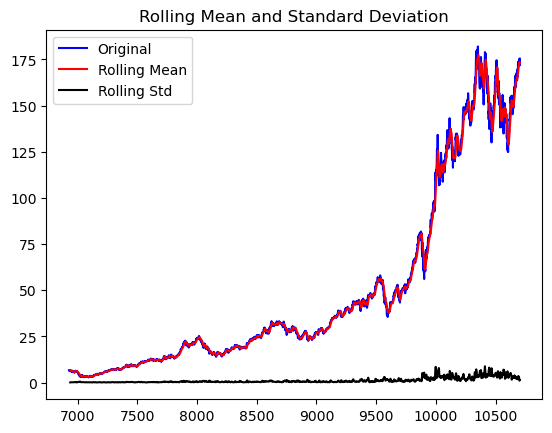

Results of dickey fuller test
Test Statistics                   1.124122
p-value                           0.995417
No. of lags used                 26.000000
Number of observations used    3751.000000
critical value (1%)              -3.432095
critical value (5%)              -2.862311
critical value (10%)             -2.567180
dtype: float64


In [58]:
#Test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

df_close = apple_data_last_15yrs['close']
test_stationarity(df_close)

##### In order to remove stationarity, we must perform the method of differencing on our data which is the closing price of the Apple stock for the past 15 years since 2008. Here we can see how the time series has become stationary. One thing which is noticeable here is that the first-order differencing is almost equal to second-order differencing given that the noise of both the differencing is almost the same. Thus, we can conclude that $d$ = 1 

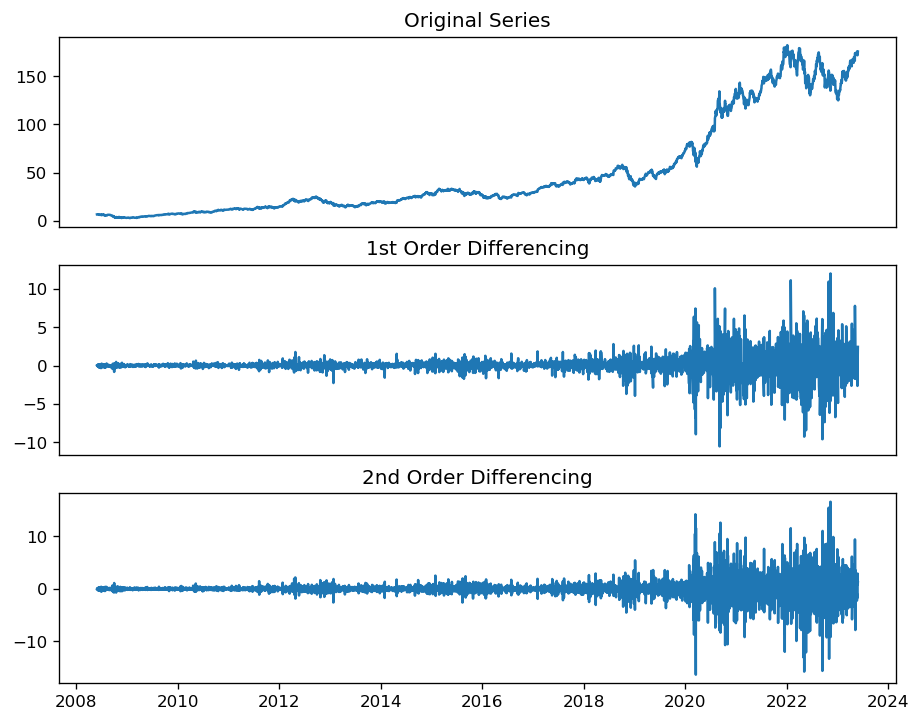

In [59]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(apple_data_last_15yrs['date'], apple_data_last_15yrs.close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(apple_data_last_15yrs['date'], apple_data_last_15yrs.close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(apple_data_last_15yrs['date'], apple_data_last_15yrs.close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

##### Now we check for seasonality. The following code does a seasonal decomposition using a multiplicative model of 74. In a multiplicative model, the seasonal component is expressed as a proportion or percentage of the trend component. This model is suitable when the magnitude of the seasonal pattern varies with the level of the time series. Moreover, we know that there are 21 working days in the stock market every month, so with a period of 74, we consider the seasonal cycle of 4 months (15*12/4) with a total of 45 cycles!! 

##### The graph below shows a sinosoudal curve of the seasonal composition depicting that there is seasonality in the dataset which must be taken into consideration

<Figure size 1080x840 with 0 Axes>

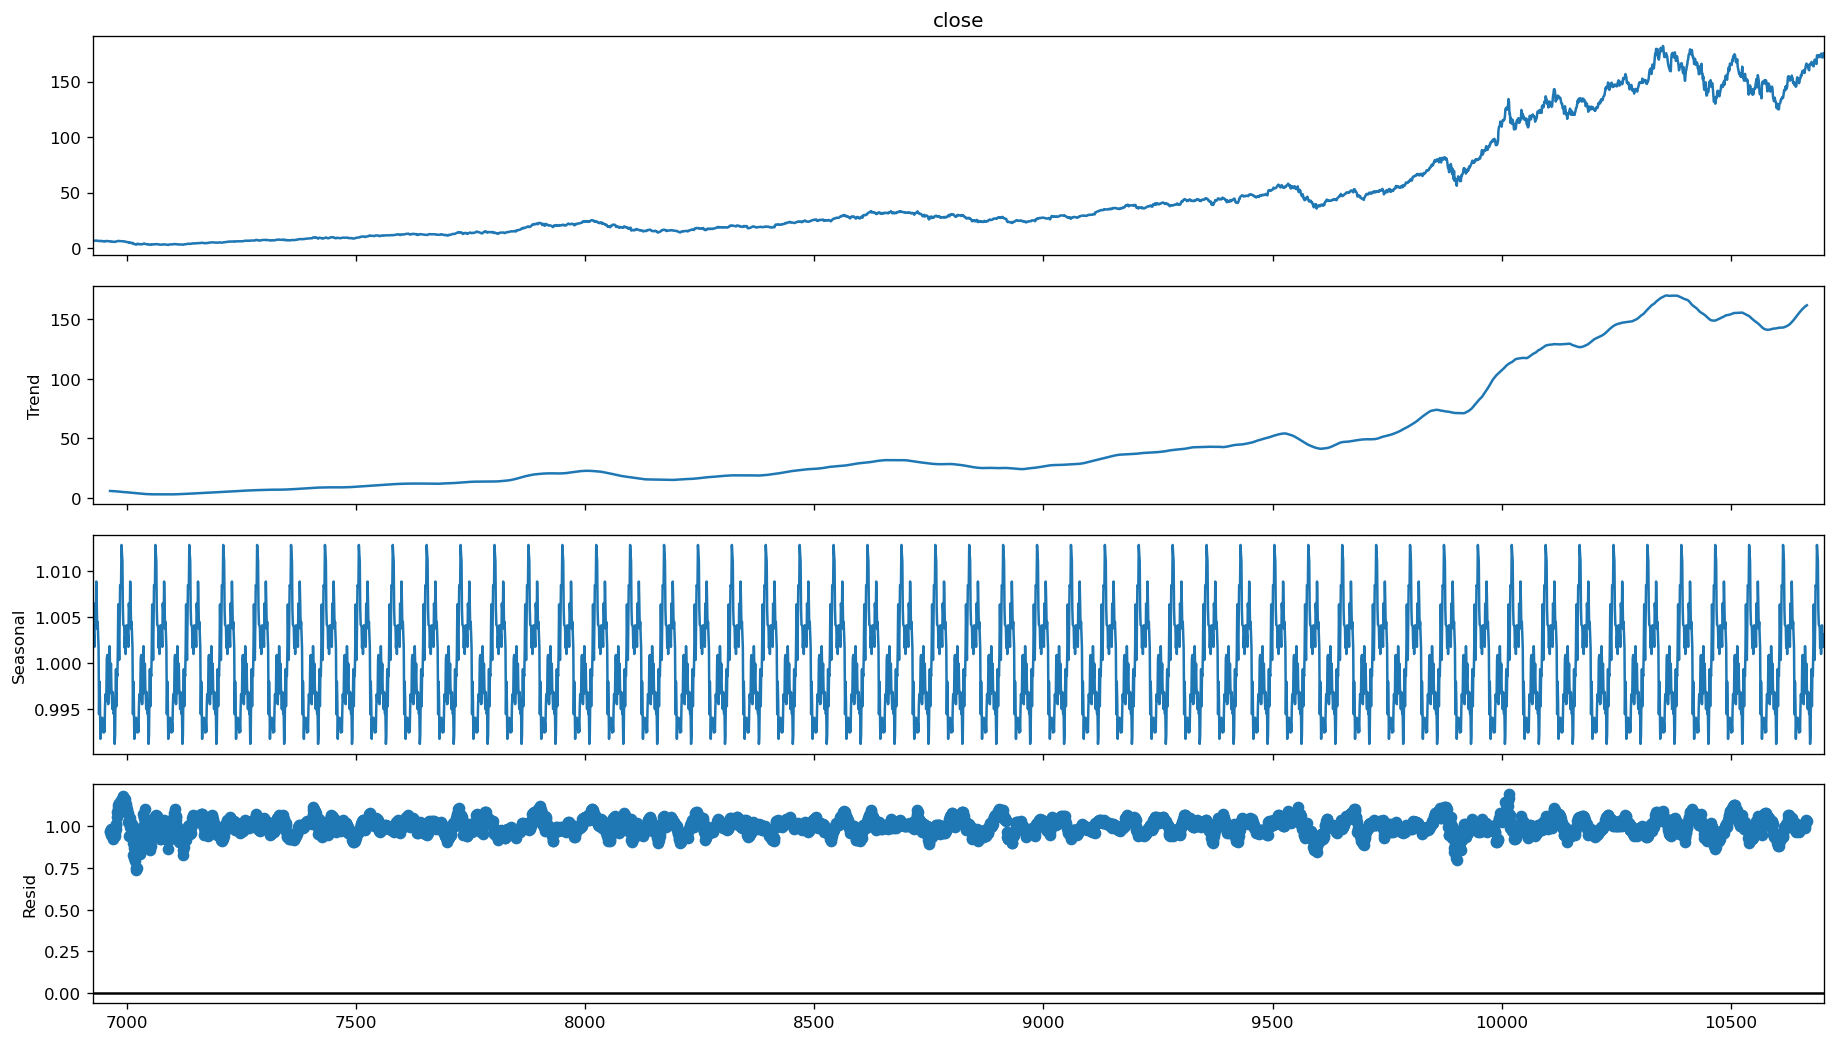

In [60]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', period = 74)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

##### We now aim to find the other parameters for the ARIMA model. In particular we want to find the $p$ and $q$ values step-by-step. We draw a partial autocorrelation graph (ACF) of the data. This will help us in finding the value of $p$ because the cut-off point to the PACF is $p$. Similarly, we draw an autocorrelation graph(ACF) of the data. This will help us in finding the value of $q$ because the cut-off point to the ACF is $q$. Note that we do this for the training data and not the whole dataset so we split the training and testing now.

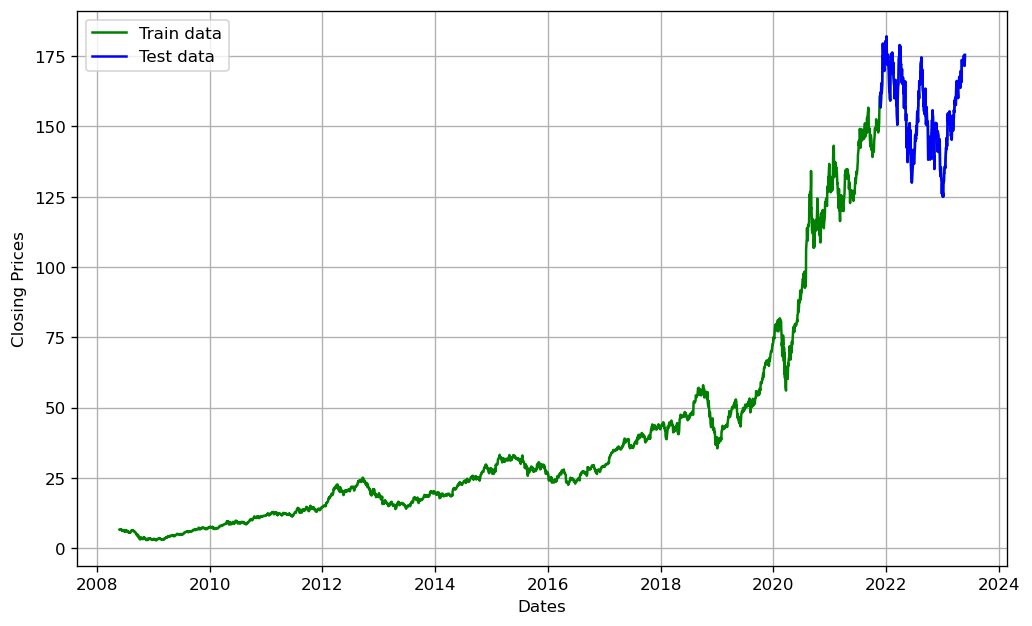

In [61]:
#split data into train and training set
train_data, test_data = apple_data_last_15yrs[0:int(len(apple_data_last_15yrs)*0.9)], apple_data_last_15yrs[int(len(apple_data_last_15yrs)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(apple_data_last_15yrs['date'], apple_data_last_15yrs['close'], 'green', label='Train data')
plt.plot(test_data['date'], test_data['close'], 'blue', label='Test data')
plt.legend()

In [62]:
train_data = train_data.set_index('date')
test_data = test_data.set_index('date')

##### Finding the value of the $p$ parameter
##### The partial autocorrelation function plot can be used to draw a correlation between the time series and its lag while the contribution from intermediate lags can be ignored. This plotting will let us know about the lags that are not required in the autoregression part. We can choose $p$ = 2 as determined by the partial autocorrelation plot below

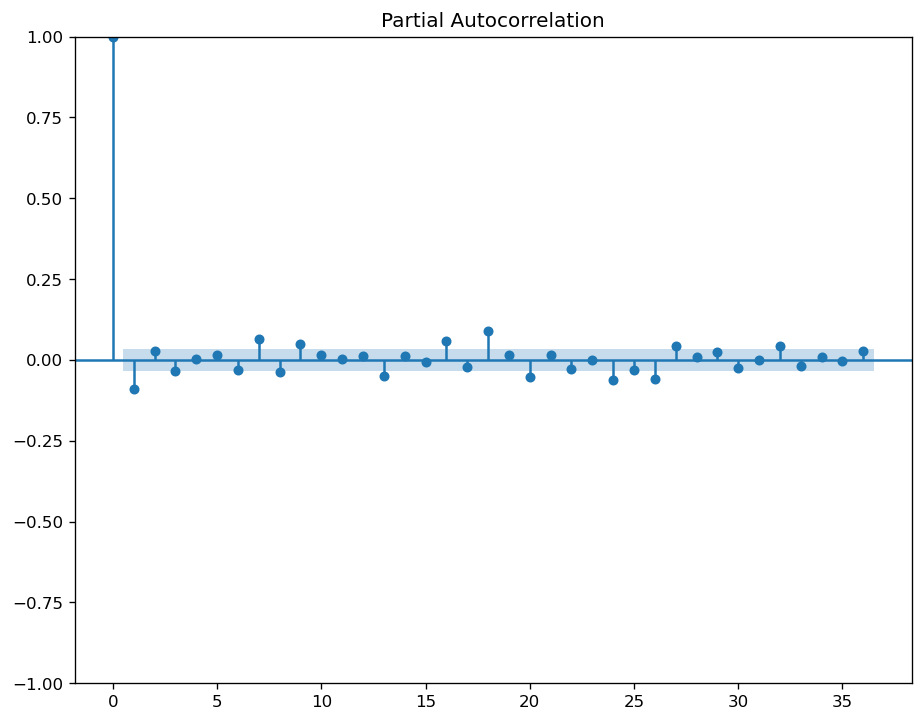

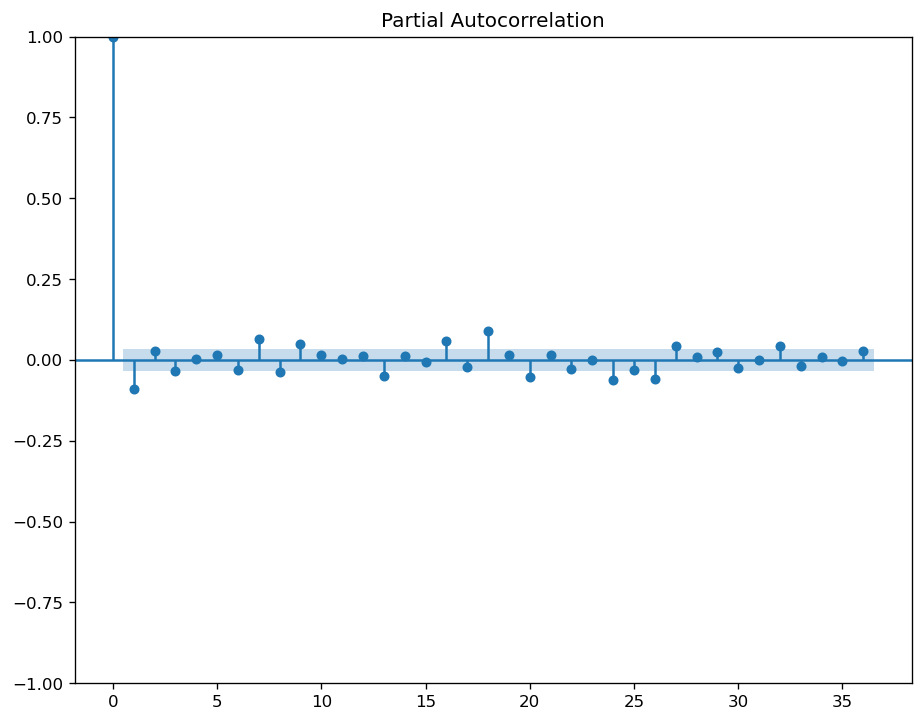

In [63]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train_data.close.diff().dropna()) # to calculate optimal p

##### Finding the value of the $q$ parameter
##### To find out the value of $q$ we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series. We can observe that $q$ = 0 by the plots below 

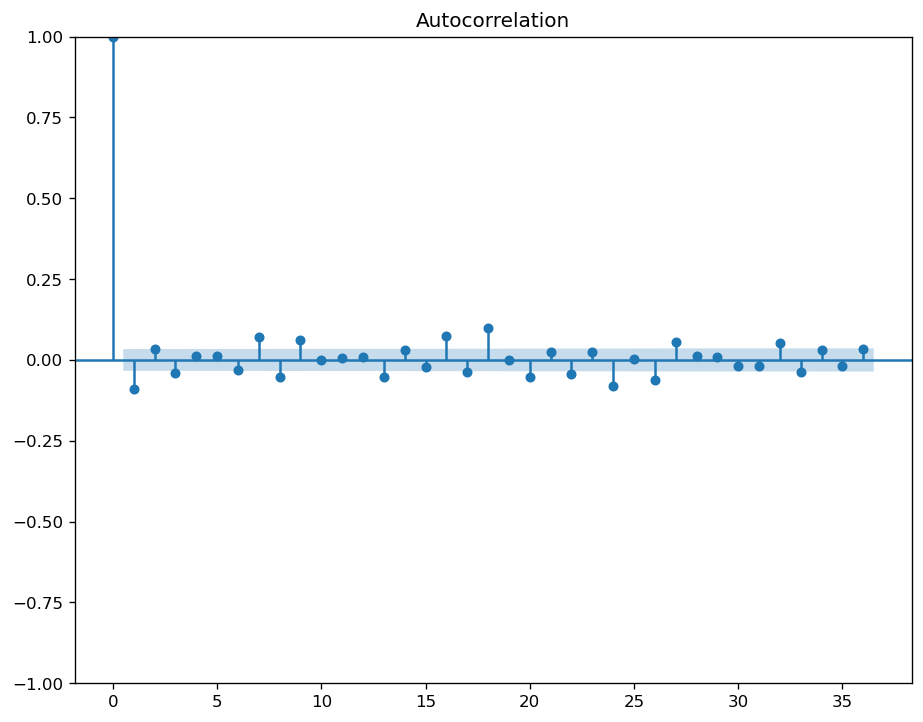

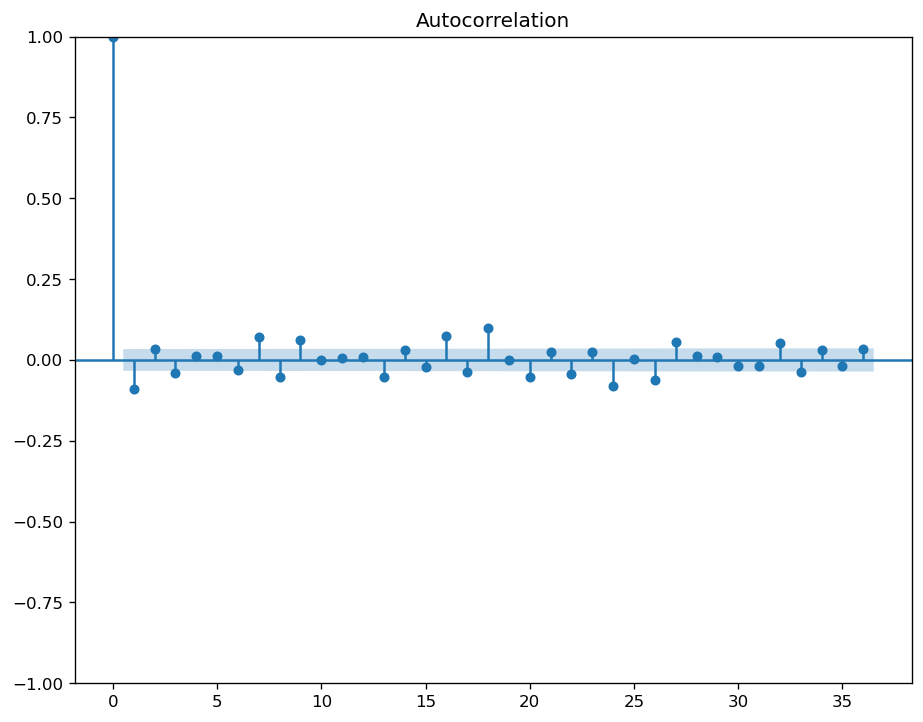

In [64]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_data.close.diff().dropna())

##### We can also use auto-arima function to calculate $p$, $d$, $q$ values rather than using ACF and PACF plots

In [65]:
apple_data_last_15yrs_date = apple_data_last_15yrs.set_index('date')

##### The graph of standardized residuals in the top left corner shows a consistent variance and fluctuates around an average of zero. It is worth noting that there are more fluctuations towards the end of the graph, indicating increased changes in stock prices during the last 2-3 years. On the top right, the density plot suggests a normal distribution centered at zero. In an ideal scenario, the red line should perfectly align with all the data points. However, our red line deviates from perfect alignment, indicating a skewed distribution. Lastly, the Correlogram (bottom right), also known as the ACF plot, demonstrates that the residual errors are not autocorrelated. This absence of autocorrelation suggests that the residual errors do not exhibit a pattern that is unexplained by the model. Consequently, it is necessary to incorporate additional predictors (Xs) into the model.

In [66]:
from pmdarima import auto_arima
model_autoARIMA = auto_arima(train_data['close'], start_p=0, start_q=0,
                      test='adf',       
                      m=12,              
                      d=None,           
                      seasonal=True,   
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

##### The results suggests that the most optimum $p$, $d$, $q$ values are 2, 1, 0 respectively. Remember that since, our data contains elements of seasonality (the sinosoudal curve), the auto_arima function also suggested us the seasonal order for our model which was unavailable with traditional ACF and PACF plots observations.

In [ ]:
model_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 3400
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -4723.129
Date:                                 Tue, 13 Jun 2023   AIC                           9462.258
Time:                                         17:36:25   BIC                           9511.307
Sample:                                              0   HQIC                          9479.789
                                                - 3400                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2101      0.078      2.703      0.007       0.058       0.363
ar.L1         -0.4144      0.064     -6.483      0.000      -0.540      -0.289
ma.L1          0.3306      0.066      4.982      0.000       0.201       0.461
ar.S.L12      -1.5362      0.065    -23.659      0.000      -1.663      -1.409
ar.S.L24      -0.7412      0.049    -15.237      0.000      -0.836      -0.646
ma.S.L12       1.5789      0.067     23.627      0.000       1.448       1.710
ma.S.L24       0.7548      0.053     14.218      0.000       0.651       0.859
sigma2         0.9409      0.007    132.534      0.000       0.927       0.955
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             60064.72
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              51.86   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Since, now we have the appropriate $p$, $d$, $q$ values respectively for our ARIMA model, we fit our model and see if our results significant.

##### The model we use is the SARIMAX(2, 1, 0)x(2, 0, [1, 2], 6). This specifies the model used for analysis. SARIMAX(2, 1, 0) represents the order of the non-seasonal components, while (2, 0, [1, 2], 6) represents the order of the seasonal components. It indicates that the model includes autoregressive terms (AR) of order 2, a differencing term (I) of order 1, and moving average terms (MA) of order 0. The seasonal components include AR terms of order 2, no differencing term (I) for the seasonal component, and MA terms of order [1, 2] with a seasonal period of 6.

In [ ]:
arima_model = sm.tsa.statespace.SARIMAX(train_data['close'],order=(1, 1, 1), seasonal_order=(2, 0, [1,2], 12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   close   No. Observations:                 3400
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -4726.860
Date:                                 Tue, 13 Jun 2023   AIC                           9467.719
Time:                                         17:36:48   BIC                           9510.638
Sample:                                              0   HQIC                          9483.059
                                                - 3400                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4361      0.062     -7.005      0.000      -0.558      -0.314
ma.L1          0.3527      0.065      5.453      0.000       0.226       0.480
ar.S.L12      -1.5015      0.056    -26.808      0.000      -1.611      -1.392
ar.S.L24      -0.7541      0.045    -16.833      0.000      -0.842      -0.666
ma.S.L12       1.5340      0.058     26.425      0.000       1.420       1.648
ma.S.L24       0.7518      0.049     15.487      0.000       0.657       0.847
sigma2         0.9448      0.007    132.349      0.000       0.931       0.959
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             60309.01
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              53.25   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Let’s now begin forecasting stock prices on the test dataset with a 95% confidence level.
##### We forecast of the next 42 days or 2 month in terms of working days along with the testing data set. Thus, we perform an in-sample forecasting as well as out-of-sample forecasting.

In [ ]:
# Making forecast of the next 42 days or 2 month in terms of working days along with the testing data set
result = arima_result.forecast(630, alpha=0.05)
fc_data = pd.DataFrame(result)
fc_data = fc_data.reset_index()
fc_data = fc_data.drop(columns='index')


In [ ]:
test_data_check = test_data['close'][0:630].to_frame()
test_data_check = test_data_check.reset_index()

In [ ]:
# Get the last date in the dataset
last_date = test_data_check['date'].iloc[-1]

# Generate the next 2 months of dates
from datetime import datetime, timedelta
next_dates = [last_date + timedelta(days=i) for i in range(1, 61)]

# Create a new DataFrame for the next dates
next_df = pd.DataFrame({'date': next_dates})

# Merge the original dataset with the new dates
updated_df = pd.concat([test_data_check, next_df], ignore_index=True)

# Optionally, you can sort the DataFrame by date
updated_df = updated_df.sort_values('date')

In [ ]:
# Merge based on index
forecasted_vals = pd.merge(fc_data, updated_df, left_index=True, right_index=True)
forecasted_vals = forecasted_vals.drop(columns= 'close')
forecasted_vals = forecasted_vals.set_index('date')

##### The graph gives us a good indication over how the stock prices would look like in the next few months, given our last data point was May 26th, 2023. Our forecasted values are quite well close to the original/actual points. Note that this is a 95% confidence interval predicted values!

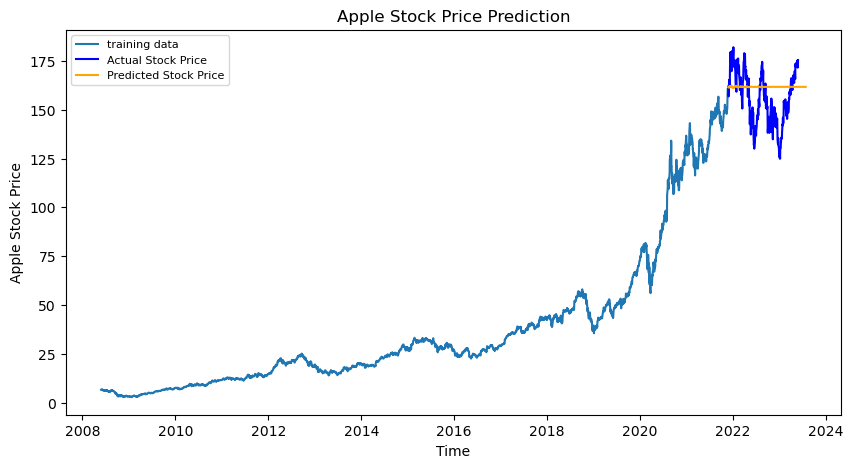

In [ ]:
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data['close'], label='training data')
plt.plot(test_data['close'], color = 'blue', label='Actual Stock Price')
plt.plot(forecasted_vals, color = 'orange',label='Predicted Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
import math
# report performance
mse = mean_squared_error(test_data_check['close'], forecasted_vals['predicted_mean'].head(378))
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_check['close'], forecasted_vals['predicted_mean'].head(378))
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_check['close'], forecasted_vals['predicted_mean'].head(378)))
print('RMSE: '+str(rmse))

MSE: 205.56093908110645
MAE: 11.972822125396998
RMSE: 14.33739652381514


## Prophet Model

##### The Meta's Prophet forecasting model refers to a variant or extension of the original Prophet forecasting model developed by Facebook's Core Data Science team. The Prophet model is designed for time series forecasting, specifically for applications where the time series data exhibits various patterns such as trends, seasonality, and holiday effects. The Meta's Prophet model builds upon the foundations of the original Prophet model and introduces additional features and capabilities.

##### The Meta's Prophet model supports the modeling and forecasting of multiple seasonalities within a time series. Seasonal patterns that occur over different frequencies, such as daily, weekly, and yearly, can be captured and incorporated into the forecasting process. This is one reason why we chose this model to predict the prices since, we already knew that there was seasonality throughout the data. Moreover, The Meta's Prophet model offers a range of customization options. Users can modify and adjust various components of the model, such as trend flexibility, seasonality modeling, and holiday effects, to better align with specific characteristics and requirements of the time series being analyzed.

In [ ]:
import pandas as pd
from prophet import Prophet
prophet_df = apple_data_last_15yrs[['date', 'close']]

##### The Meta's Prophet model provides uncertainty estimation for the forecasted values. It generates prediction intervals that quantify the level of uncertainty associated with the future forecasts, which can be useful for decision-making and risk assessment.

In [ ]:
prophet_df = prophet_df.rename(columns = {'date' : 'ds', 'close' : 'y'})
# Initialize and fit the Prophet model
model = Prophet(seasonality_mode = 'additive')
model.fit(prophet_df)

# Generate future dates for prediction
future = model.make_future_dataframe(periods=365)  # predicting for the whole year 

# Make predictions
forecast = model.predict(future)

17:09:54 - cmdstanpy - INFO - Chain [1] start processing
17:09:57 - cmdstanpy - INFO - Chain [1] done processing


##### The Meta's Prophet model simplifies the forecasting process by providing automated functionalities. It automates the selection of appropriate model parameters, handles missing data, and handles outliers, making it easier for users to generate accurate forecasts without extensive manual tuning.

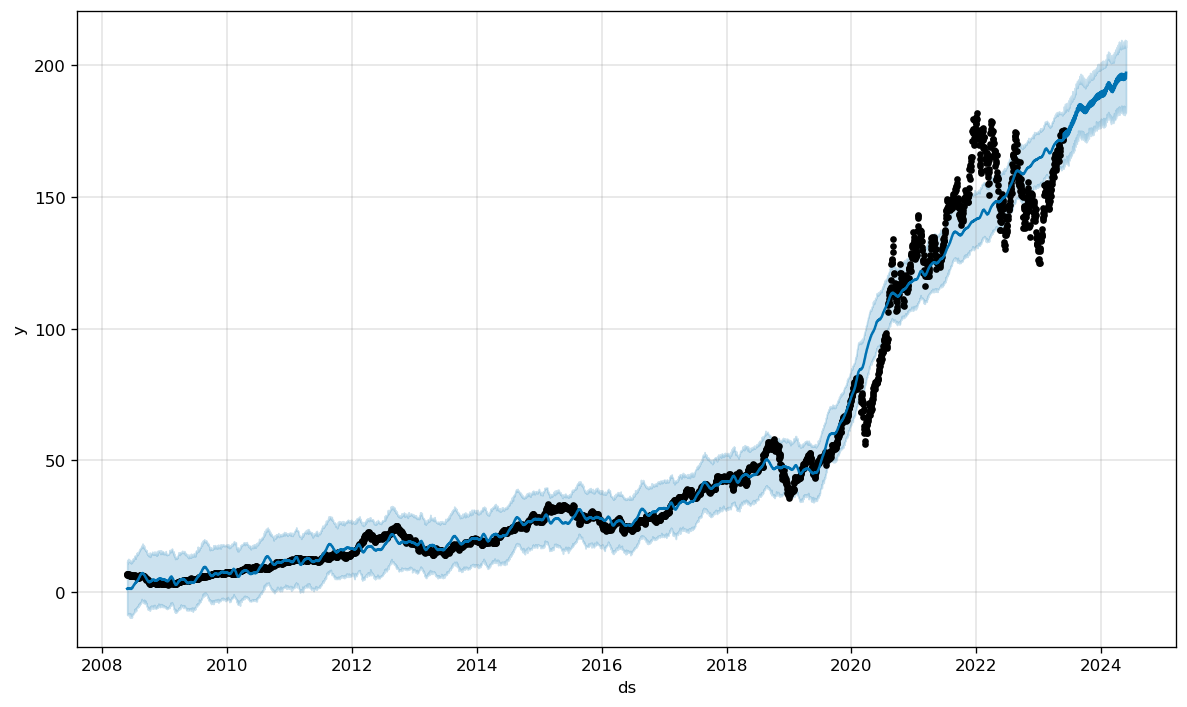

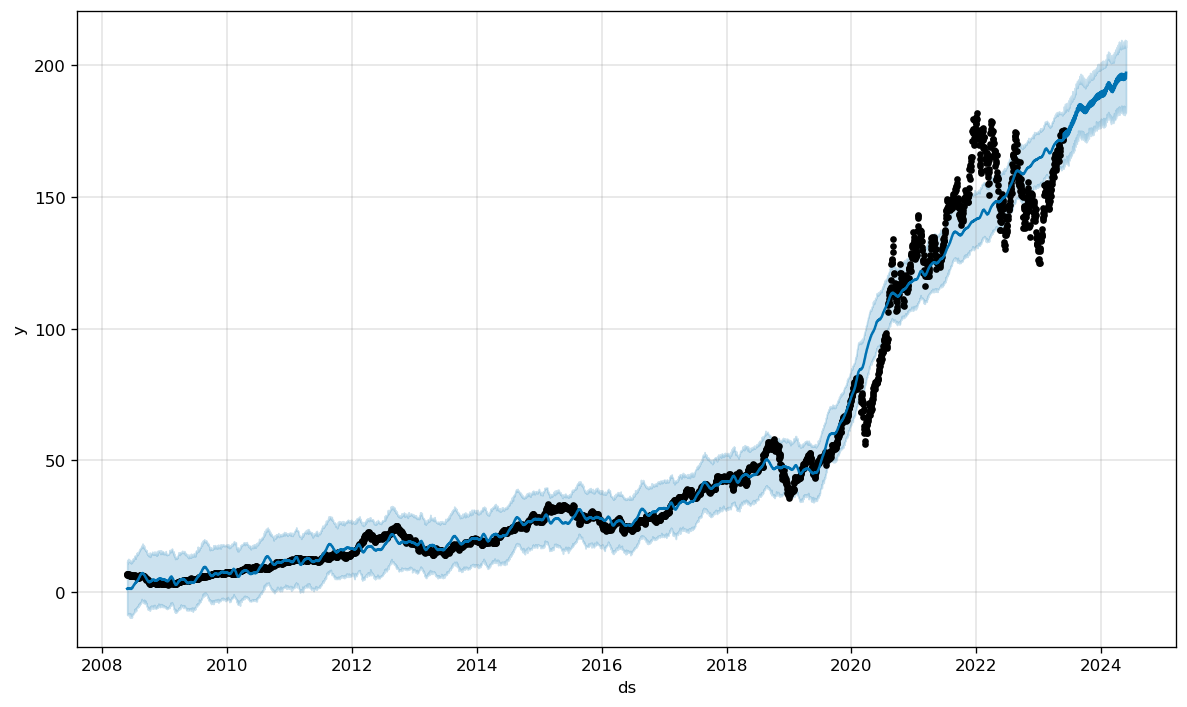

In [ ]:
# Plot the forecast
model.plot(forecast)

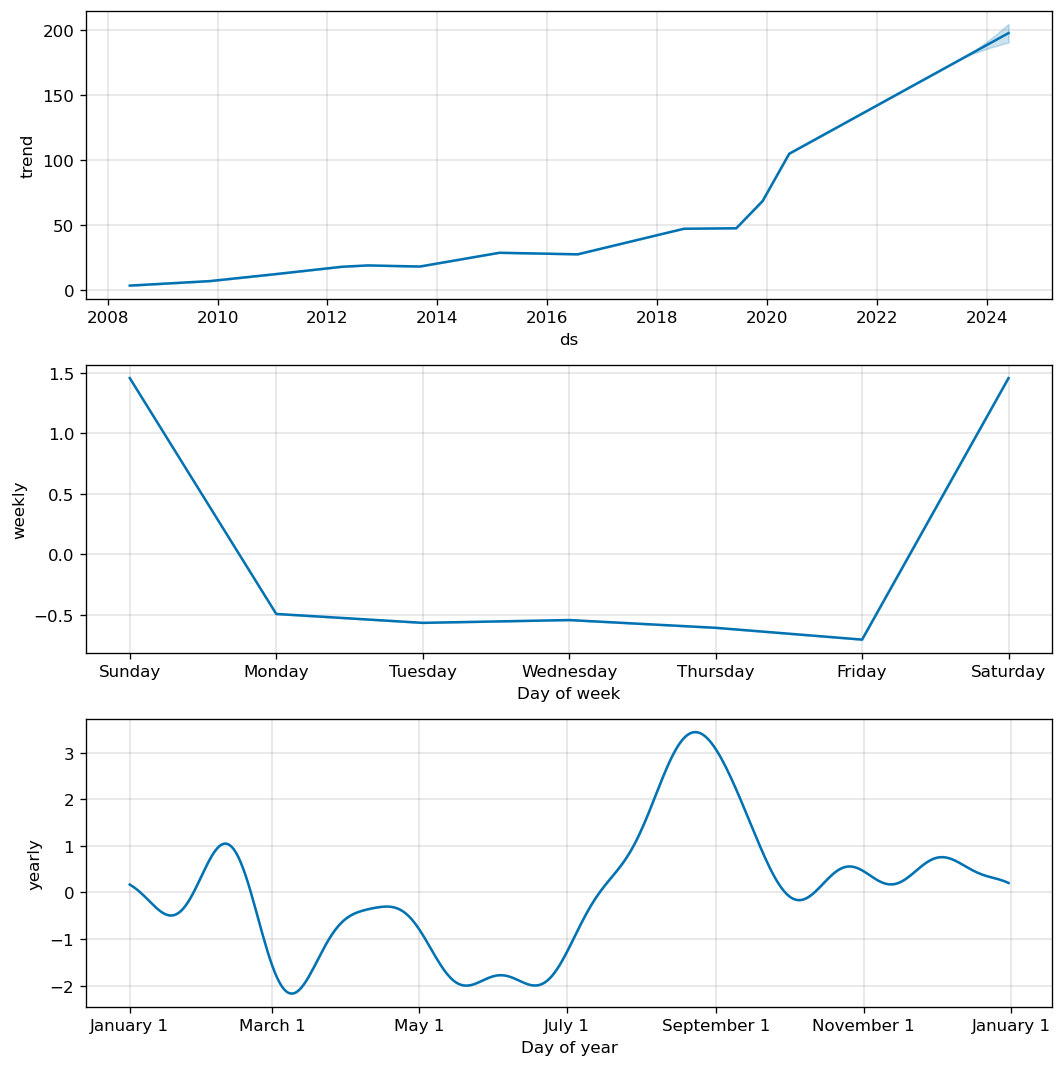

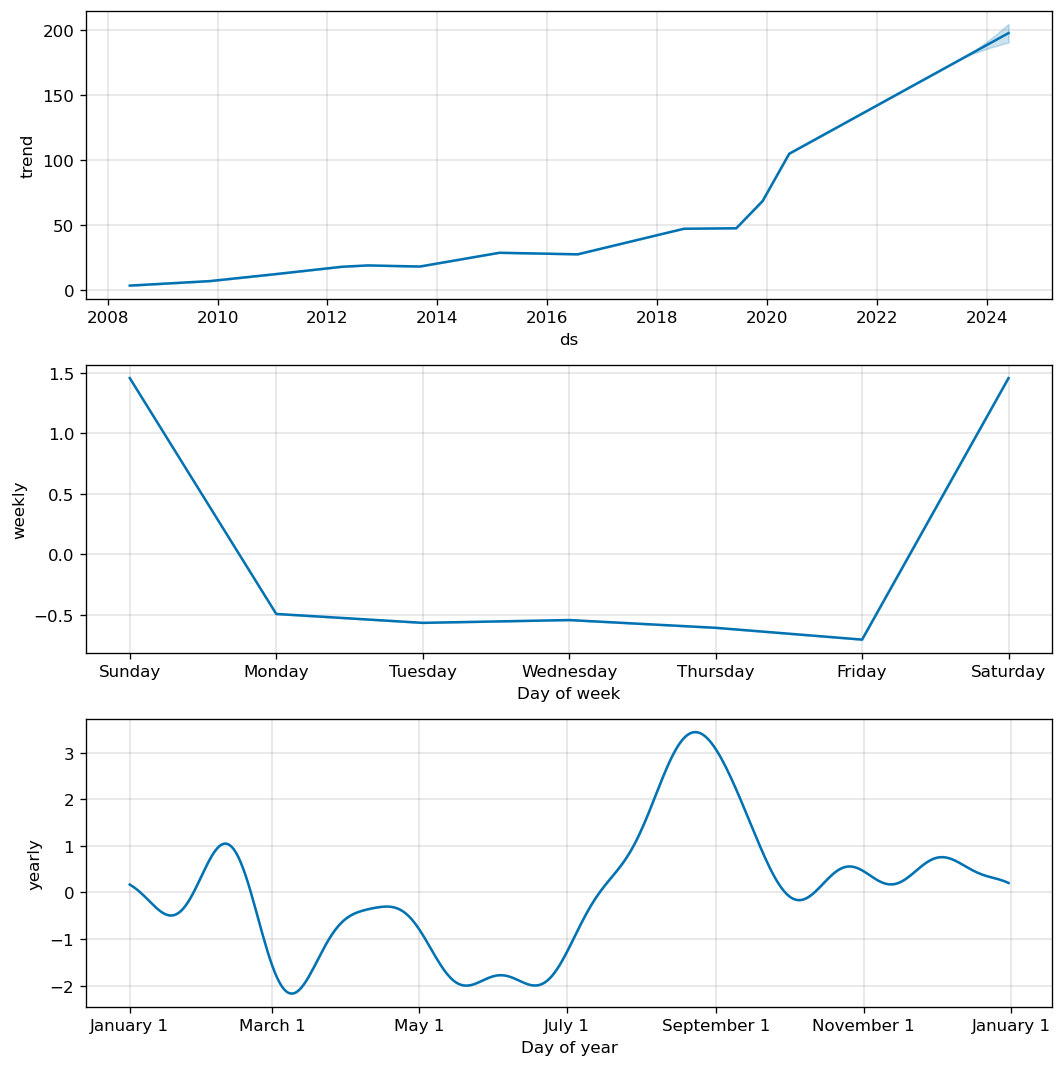

In [ ]:
model.plot_components(forecast)

##### Overall, the Meta's Prophet forecasting model builds upon the strengths of the original Prophet model and extends its capabilities to handle hierarchical forecasting and multiple seasonality. It offers automation, customization, and uncertainty estimation features to provide accurate and reliable forecasts for time series data.

## Long short term memory (LSTM) Model

##### The Long Short-Term Memory (LSTM) model is a type of recurrent neural network (RNN) that is commonly used in the context of stock price prediction. LSTM models are particularly effective for modeling time series data, such as stock prices, because they can capture long-term dependencies and handle the vanishing gradient problem that often occurs in traditional RNNs.
##### In the context of stock price prediction, an LSTM model is trained to learn patterns and relationships in historical stock price data, and then used to make predictions about future price movements. The model takes in a sequence of historical prices as input and produces a prediction for the next price in the sequence. The architecture of an LSTM model consists of multiple memory cells, which allow the model to remember information over long periods of time. Each memory cell has three main components: an input gate, a forget gate, and an output gate. These gates control the flow of information into and out of the memory cell.
##### During training, the LSTM model learns to adjust the weights and biases of these gates based on the input data, in order to capture the patterns and dependencies in the stock price data. The model learns to decide when to remember or forget certain information from the past and when to output predictions based on the current input. To predict stock prices, the LSTM model takes a sequence of historical prices as input and processes them through the memory cells. The final output of the model is the predicted next price in the sequence. The model can be trained using a variety of techniques, such as backpropagation through time, where the weights and biases are adjusted based on the prediction error.

##### The following code pre-process the data that we can ingest into the LSTM model. Since, our main concern is the closing stock prices we only keep that in our data set. Note we keep using the last 15 years of data. The code outputs the number of training data length

In [ ]:
data = apple_data_last_15yrs.reset_index()
data = data.drop(columns='index')
data = data.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

3590

##### The following code is performing min-max scaling on the values containing in the dataset, which rescales the features to a specific range. Note that the MinMaxScaler is a data preprocessing technique that scales the features of a dataset to a specific range, usually between 0 and 1. The "feature_range" parameter specifies the desired range for the scaled features. In this case, it is set to (0,1), which means the scaled features will be in the range from 0 to 1. The "fit_transform" method computes the minimum and maximum values of the dataset and then scales the data according to the specified feature range.

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

##### We now prepare training data for the LSTM model, specifically a recurrent neural network (RNN). The code basically prepares the training data by creating sequences of length 60 from the train_data array and their corresponding labels. It converts the data to numpy arrays and reshapes x_train to match the expected input shape for an RNN or similar model.

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)      
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02156801, 0.0216836 , 0.02161982, 0.02203034, 0.02150225,
       0.02135677, 0.02132091, 0.02216585, 0.02141058, 0.02060748,
       0.02141058, 0.02044806, 0.0189435 , 0.01876614, 0.01965692,
       0.02057162, 0.02003755, 0.02046599, 0.01934405, 0.01892358,
       0.01894151, 0.01976652, 0.01794711, 0.01831179, 0.0177837 ,
       0.01922648, 0.01793116, 0.01831776, 0.01932213, 0.02019697,
       0.01914079, 0.01961507, 0.01880799, 0.01906705, 0.01822211,
       0.01885383, 0.01865454, 0.01732734, 0.01755453, 0.0167036 ,
       0.01754854, 0.01610776, 0.01672353, 0.01518509, 0.01571916,
       0.01627714, 0.01609181, 0.01563546, 0.01495194, 0.0164286 ,
       0.01713604, 0.01701249, 0.01820417, 0.01900328, 0.019635  ,
       0.02014715, 0.02015114, 0.01943772, 0.01936797, 0.01899731])]
[0.01945764249398961]

[array([0.02156801, 0.0216836 , 0.02161982, 0.02203034, 0.02150225,
       0.02135677, 0.02132091, 0.02216585, 0.02141058, 0.02060748,
       0.02141058, 0.02044806, 0.01

##### The code is responsible for building, compiling, and training an LSTM (Long Short-Term Memory) model using the Keras library. It builds an LSTM model with two LSTM layers, followed by dense layers. It compiles the model with an optimizer and loss function and trains the model using the specified training data.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential() # A sequential model allows us to build a 
                     # deep learning model by stacking layers in a linear manner.
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3530/3530 [==============================] - 76s 21ms/step - loss: 9.3856e-04


##### The code prepares the testing data by creating sequences of length 60 from a subset of the scaled_data array. It feeds the x_test data into a machine learning model to make predictions and calculates the RMSE between the predicted values and the actual values from the original dataset. The RMSE serves as a metric to evaluate the accuracy of the model's predictions.

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 1s 22ms/step


5.71612868419345

##### We can observe how close the predictions are with the test data. The predictions follow a very similar pattern along the test data indicating how pwerful our LSTM model is. By adding more layers in the previous section, we could have increased the accuracy. Nevertheless our predictions are very much precise as well!

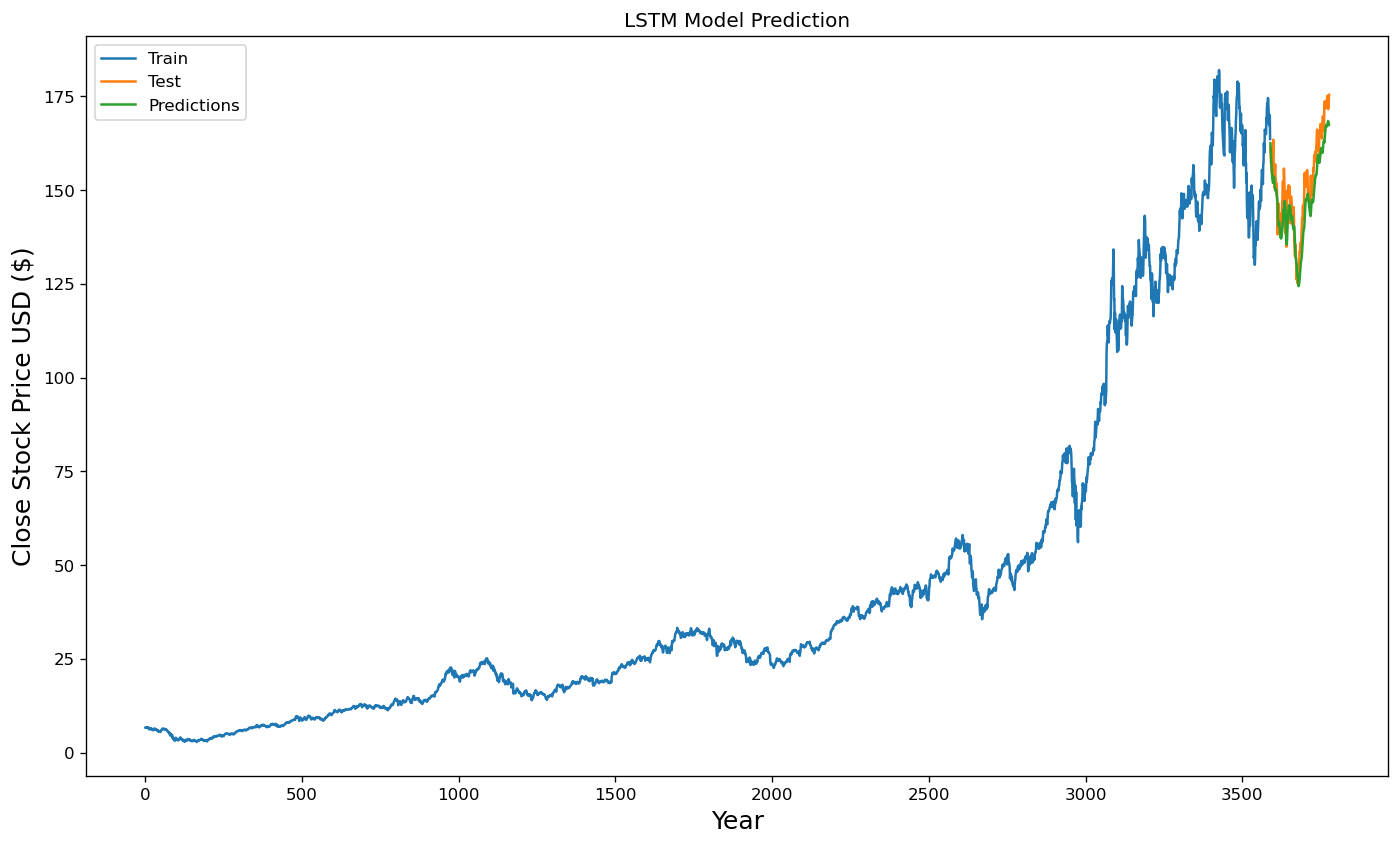

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,8))
plt.title('LSTM Model Prediction')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Close Stock Price USD ($)', fontsize=15)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='best')
plt.show()

##### It's important to note that while LSTM models have shown promise in stock price prediction, predicting stock prices accurately is a challenging task due to the inherent complexity and unpredictability of financial markets. Many other factors, such as market news, economic indicators, and investor sentiment, can also impact stock prices and should be considered when building predictive models.

##### The closing price of an asset is the fundamental yardstick that traders use to measure its performance over time. Closing price means the last price for which a stock trades during a normal trading session which is the reason we focused on closing prices throughout the forecasting. We saw that since, ARIMA is based on regression we could see a single line while the Prophet and LSTM model are much more rigorous in its machine learning algorithms, thus, they have better predictions as seen in their respecitve plots.